In [ ]:
!pip install faker
!pip install pandas
!pip install openpyxl
!pip install matplotlib
!pip install numpy
!pip install Jinja2

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [24]:
# open connection
db_path = 'db.sqlite3'
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

### Display total votes per political party (National Vote)

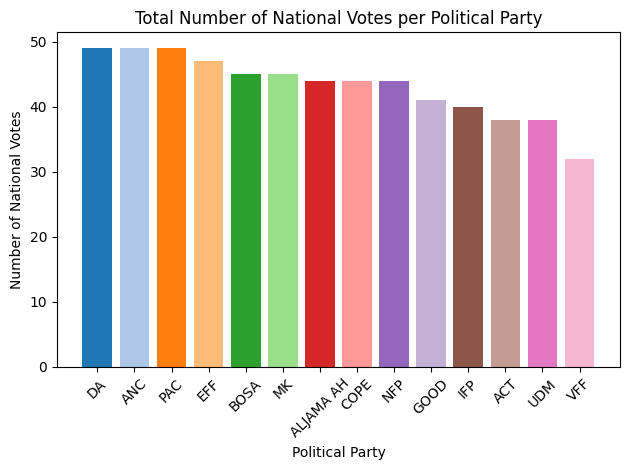

In [25]:
# Function to create a connection to the SQLite database


# Query to get the total number of national votes per political party
query = """
    SELECT national, COUNT(*) as count
    FROM voteapp_vote
    GROUP BY national;
"""
cursor.execute(query)
national_votes_per_party = cursor.fetchall()


# Convert the query result to a DataFrame for better visualization
df_national_votes = pd.DataFrame(national_votes_per_party, columns=['Party', 'Vote Count'])

# Display the filtered DataFrame
# print(df_national_votes)
df_national_vote_without_None = df_national_votes[1:]
df_national_vote_without_None = df_national_vote_without_None.sort_values(by='Vote Count', ascending=False)

# Plot the data
fig, ax = plt.subplots()
colors = plt.cm.tab20.colors  # Use a colormap for distinct colors
ax.bar(df_national_vote_without_None['Party'], df_national_vote_without_None['Vote Count'], color=colors)
ax.set_xlabel('Political Party')
ax.set_ylabel('Number of National Votes')
ax.set_title('Total Number of National Votes per Political Party')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


        Party  Vote Count
12        PAC           8
5        COPE           7
9         IFP           7
10         MK           6
7         EFF           6
13        UDM           6
1         ACT           5
11        NFP           5
4        BOSA           5
2   ALJAMA AH           5
14        VFF           5
3         ANC           4
8        GOOD           4
6          DA           3


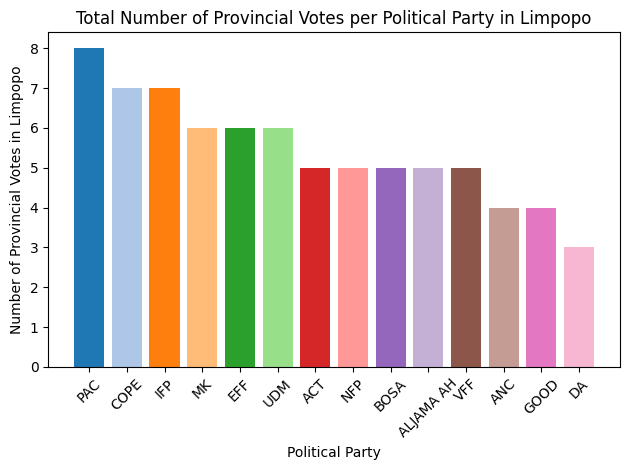

In [37]:

# Query to get the total number of votes per political party in Limpopo
query = """
    SELECT v.provincial, COUNT(*) as count
    FROM voteapp_voter as vv
    JOIN voteapp_address as a ON vv.address_id = a.id
    JOIN voteapp_vote as v ON vv.vote_id = v.id
    WHERE a.province = 'Limpopo'
    GROUP BY v.provincial;
"""
cursor.execute(query)
limpopo_votes_per_party = cursor.fetchall()

# Close the connection

# Convert the query result to a DataFrame for better visualization
df_limpopo_votes = pd.DataFrame(limpopo_votes_per_party, columns=['Party', 'Vote Count']).sort_values(by='Vote Count', ascending=False)
df_limpopo_votes = df_limpopo_votes[1:]
df_limpopo_votes

print(df_limpopo_votes) # print the data frame

# Plot the data
fig, ax = plt.subplots()
colors = plt.cm.tab20.colors  # Use a colormap for distinct colors
ax.bar(df_limpopo_votes['Party'], df_limpopo_votes['Vote Count'], color=colors)
ax.set_xlabel('Political Party')
ax.set_ylabel('Number of Provincial Votes in Limpopo')
ax.set_title('Total Number of Provincial Votes per Political Party in Limpopo')

plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()
